In [1]:
import cv2
import numpy as np
from utils import imshow
import matplotlib.pyplot as plt

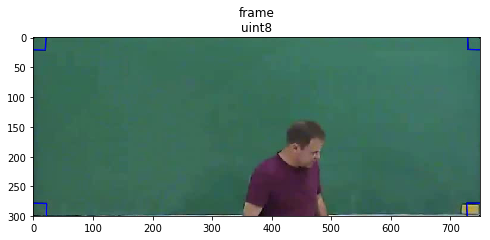

In [2]:
cap = cv2.VideoCapture('../project/output.avi')

_, frame = cap.read()
imshow('frame', frame)

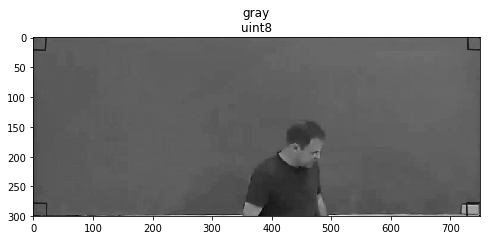

In [3]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
imshow('gray', gray, gray=True)

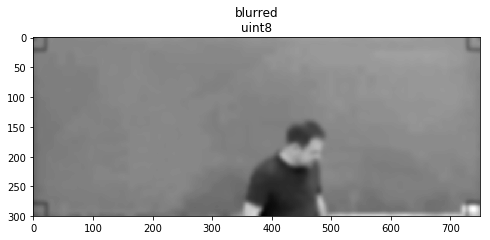

92
92


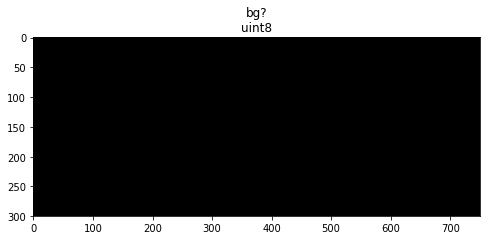

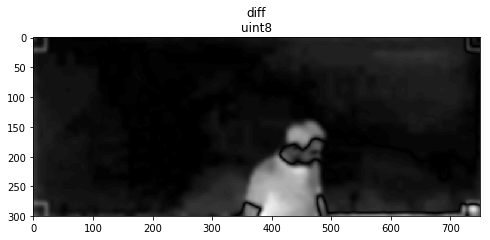

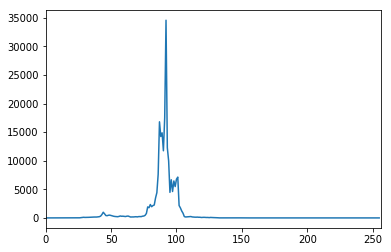

In [4]:
gray = cv2.GaussianBlur(gray, (21, 21), 0)
imshow('blurred', gray, gray=True)
hist = cv2.calcHist([gray], [0], None, [256], [0,256])
print np.argmax(hist)
bg = np.ones_like(gray, dtype='uint8')*np.argmax(hist)
print bg[50,50]
imshow('bg?', bg, gray=True)
imshow('diff', cv2.absdiff(bg, gray), gray=True)
plt.plot(hist); plt.xlim([0,256]); plt.show()


In [5]:
while 1:
    _, frame = cap.read()
    if not _:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frameDelta = cv2.absdiff(gray,bg)
    thresh = cv2.threshold(frameDelta, 25, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.dilate(thresh, None, iterations=2)
    margin = 10
    thresh[0:margin,:] = 0
    thresh[-1-margin:-1,:] = 0
    thresh[:,0:margin] = 0
    thresh[:,-1-margin:-1] = 0

    cv2.imshow('diff', thresh)
    
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[1]
 
    # loop over the contours
    for c in cnts:
        # if the contour is too small, ignore it
        if cv2.contourArea(c) < 7000:
            continue
 
        # compute the bounding box for the contour, draw it on the frame,
        # and update the text
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.imshow('frame', frame)
    k = cv2.waitKey(1) & 0xff
    if k == 27:
        break
        
cv2.destroyAllWindows()
cap.release()

0.0
0.0
0.0
0.0
265.5
129.0
45.0
10100.5
2732.0
0.0
106.0
123.5
0.0
0.0
0.0
0.0
265.5
129.0
45.0
10089.0
2870.0
0.0
106.0
123.5
0.0
0.0
0.0
0.0
265.5
129.0
40.0
10197.0
2878.5
0.0
106.0
123.5
0.0
0.0
0.0
0.0
265.5
129.0
42.0
10580.0
2924.5
0.0
106.0
123.5
0.0
0.0
0.0
0.0
265.5
129.0
10942.0
3042.5
0.0
106.0
123.5
0.0
0.0
0.0
0.0
265.5
129.0
10948.5
3047.0
0.0
106.0
123.5
0.0
0.0
0.0
0.0
265.5
129.0
11101.5
3078.5
0.0
106.0
123.5
0.0
0.0
0.0
0.0
265.5
129.0
14386.0
0.0
106.0
123.5
0.0
0.0
0.0
0.0
0.0
265.5
129.0
14467.5
0.0
106.0
123.5
0.0
0.0
0.0
0.0
263.5
129.0
15044.5
0.0
106.0
123.5
0.0
0.0
0.0
0.0
265.5
129.0
14709.0
0.0
106.0
123.5
0.0
0.0
0.0
0.0
264.0
130.0
14696.0
0.0
106.0
124.5
0.0
0.0
0.0
0.0
264.0
130.0
14485.0
0.0
106.0
122.5
0.0
0.0
0.0
0.0
264.0
130.0
14520.5
0.0
106.0
123.5
0.0
0.0
0.0
0.0
264.0
136.0
14486.0
0.0
106.0
122.0
0.0
0.0
0.0
0.0
0.0
264.0
131.0
14339.0
0.0
106.0
122.0
0.0
0.0
0.0
0.0
0.0
264.0
131.0
14303.0
0.0
106.0
122.0
0.0
0.0
0.0
0.0
0.0
264.0
131.0
142